<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv", parse_dates=['Formatted Date'])

In [7]:
df.drop(columns="Formatted Date", inplace=True)
df.head()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [8]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [9]:
df.drop(columns='Loud Cover', inplace=True)

# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


<Axes: >

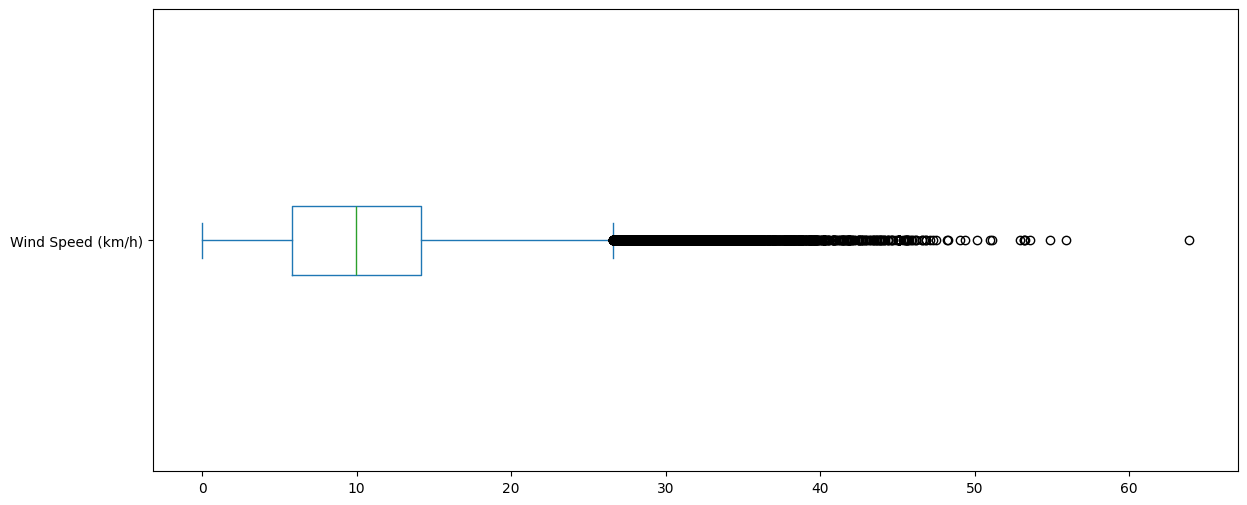

In [10]:
df['Wind Speed (km/h)'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

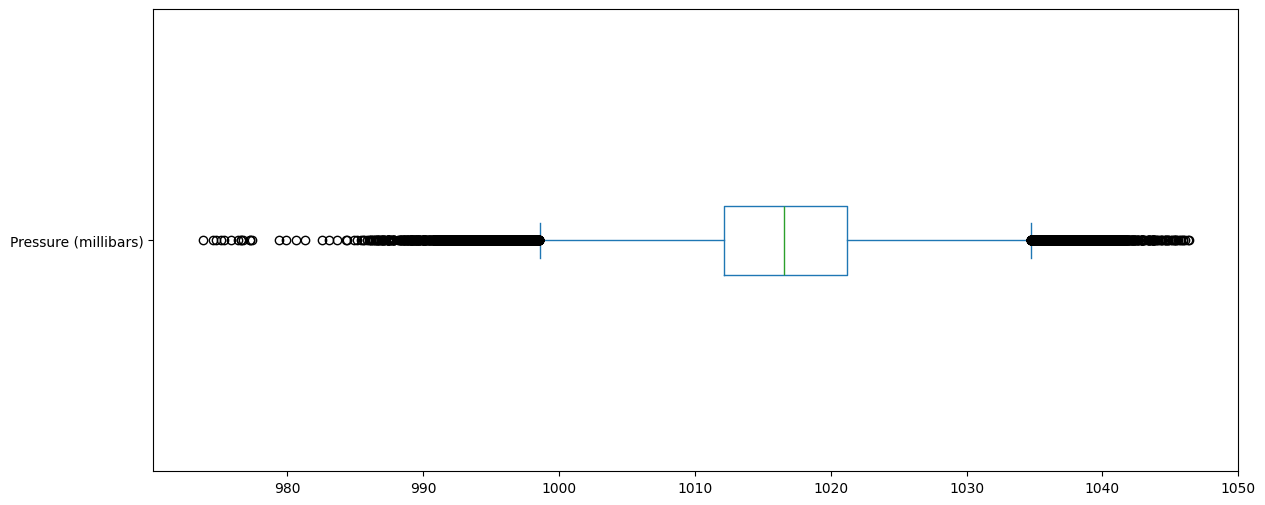

In [13]:
df['Pressure (millibars)'].plot(kind='box', vert=False, figsize=(14,6))


In [12]:
mask = df['Pressure (millibars)']>200
df = df[mask]
df.head()

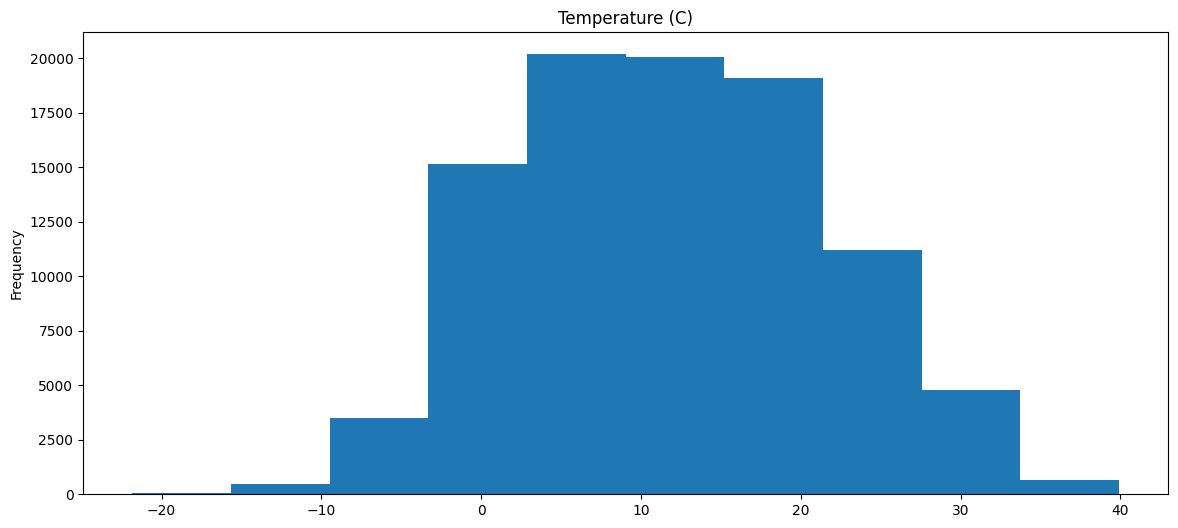

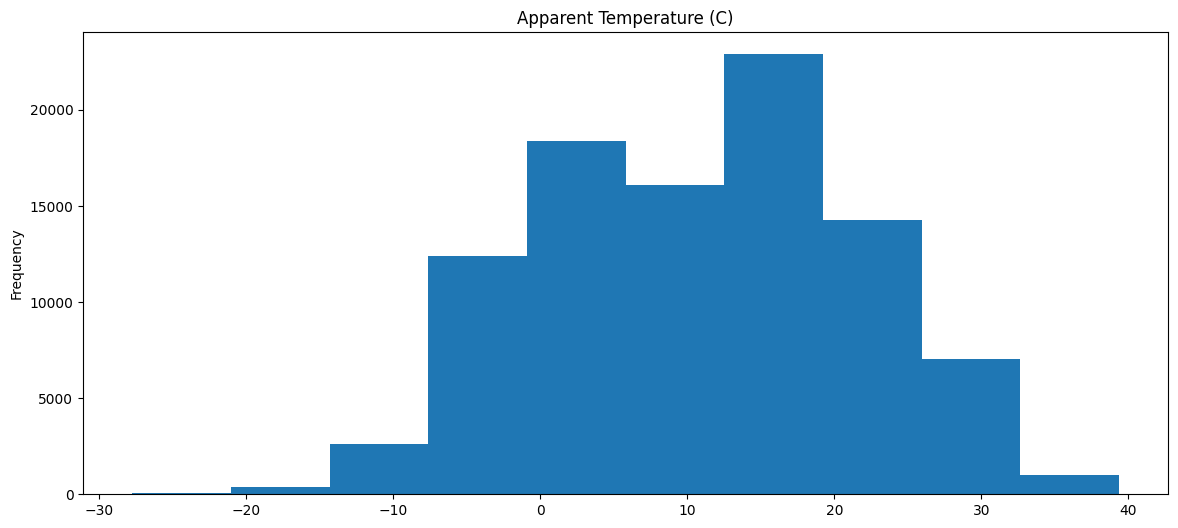

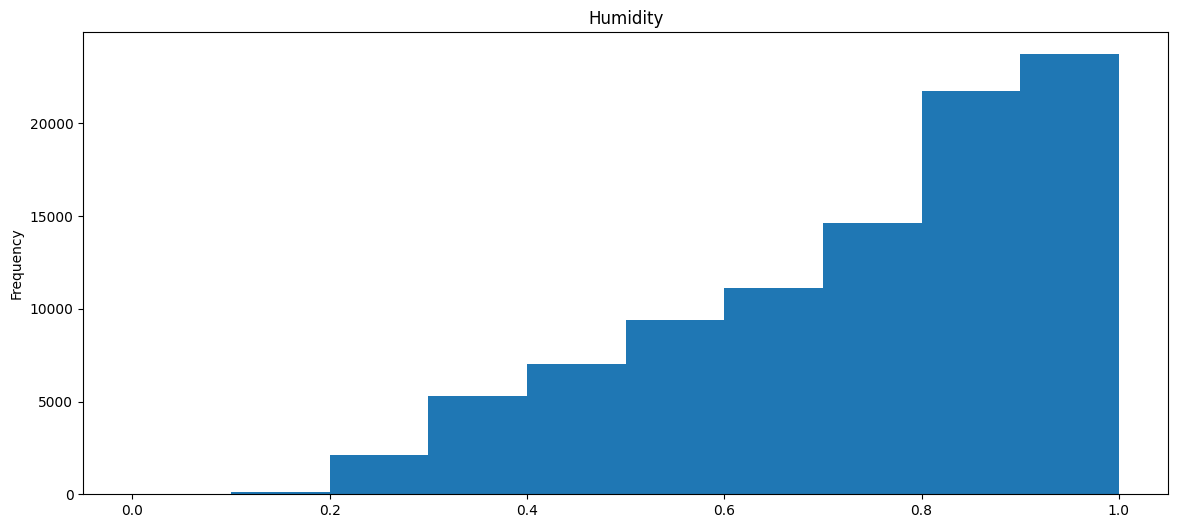

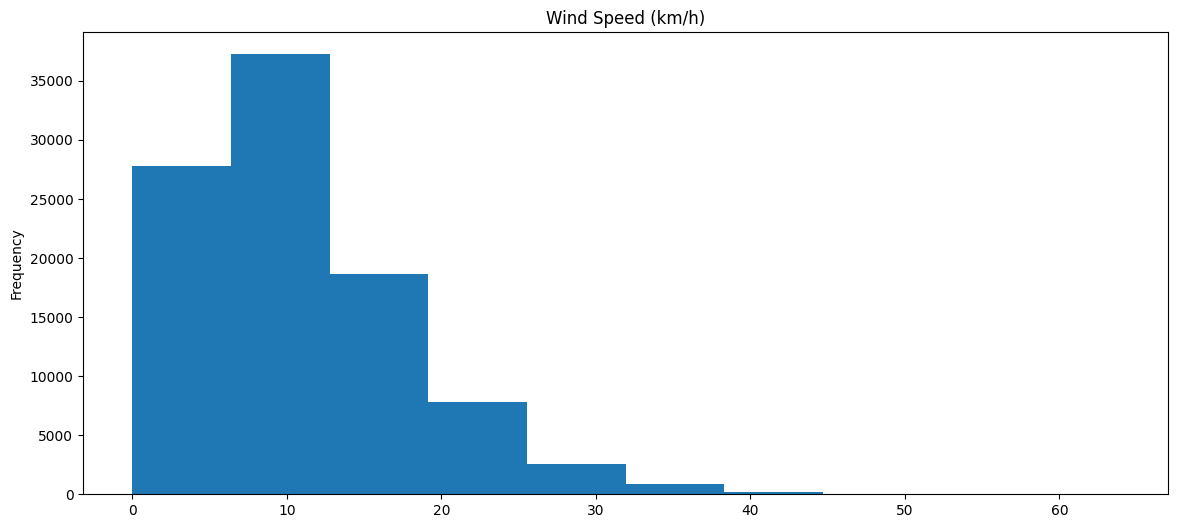

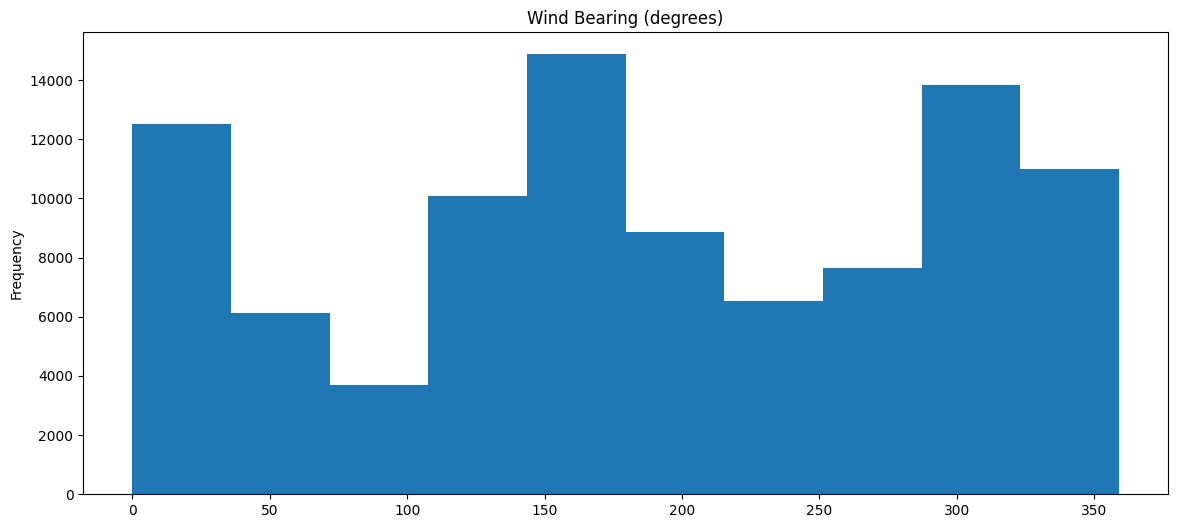

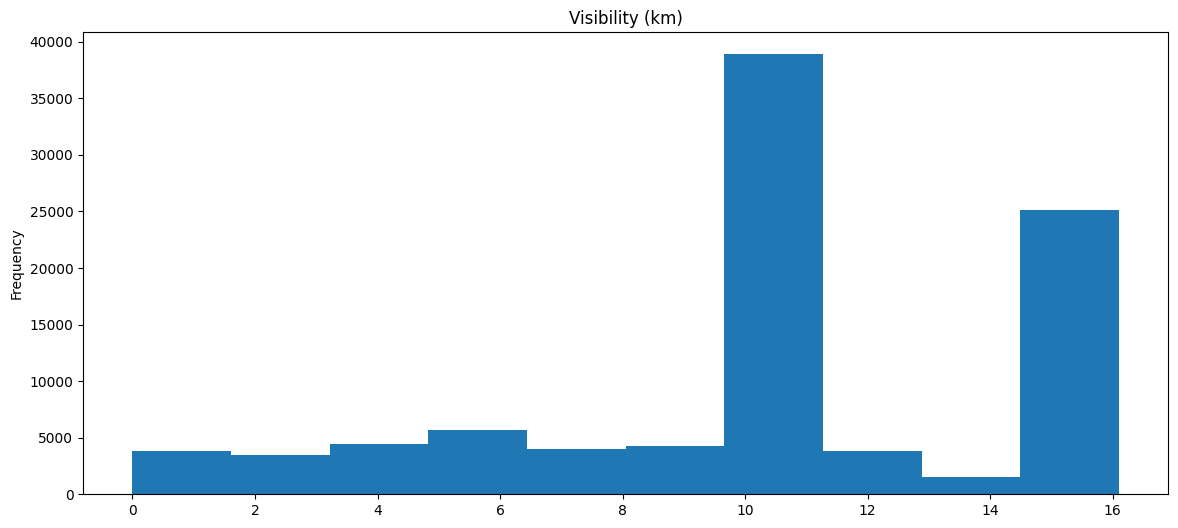

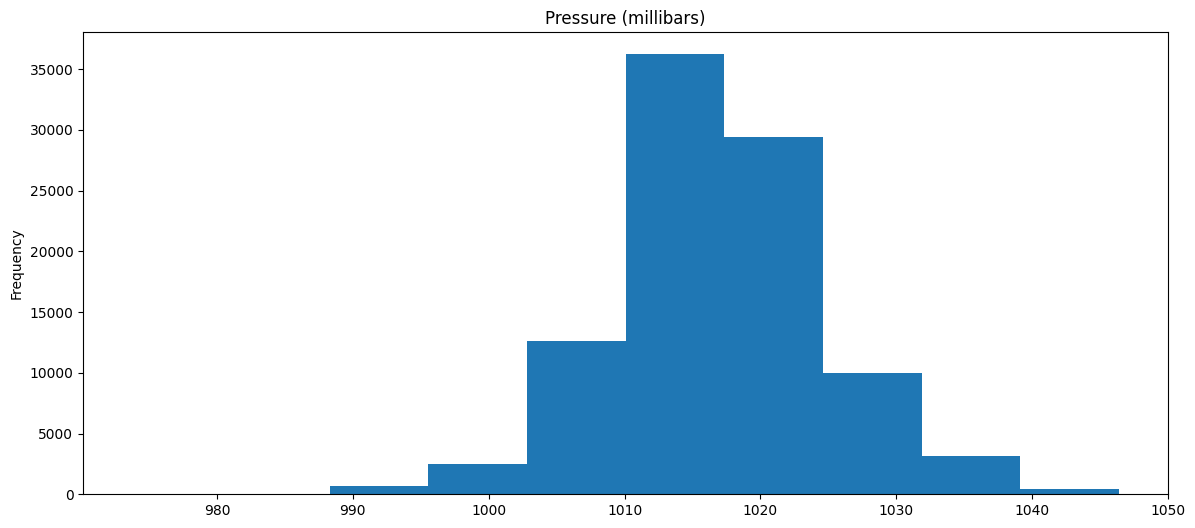

In [18]:

for col in df.select_dtypes(include='number').columns:
  df[col].plot(kind='hist', figsize=(14,6))
  plt.title(col)
  plt.show()

# Завдання 3
Очистіть дані від викидів. Оберіть стовпчики на основі ящиків з вусами

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

In [19]:
corr = df.select_dtypes(include='number').corr(method='pearson')

corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992651,-0.632776,0.010187,0.030783,0.392415,-0.310455
Apparent Temperature (C),0.992651,1.000000,-0.603435,-0.055181,0.030026,0.380975,-0.288400
Humidity,-0.632776,-0.603435,1.000000,-0.224282,0.001598,-0.370721,0.039257
Wind Speed (km/h),0.010187,-0.055181,-0.224282,1.000000,0.101633,0.102955,-0.253700
Wind Bearing (degrees),0.030783,0.030026,0.001598,0.101633,1.000000,0.047536,-0.078687
Visibility (km),0.392415,0.380975,-0.370721,0.102955,0.047536,1.000000,-0.166326
Pressure (millibars),-0.310455,-0.288400,0.039257,-0.253700,-0.078687,-0.166326,1.000000


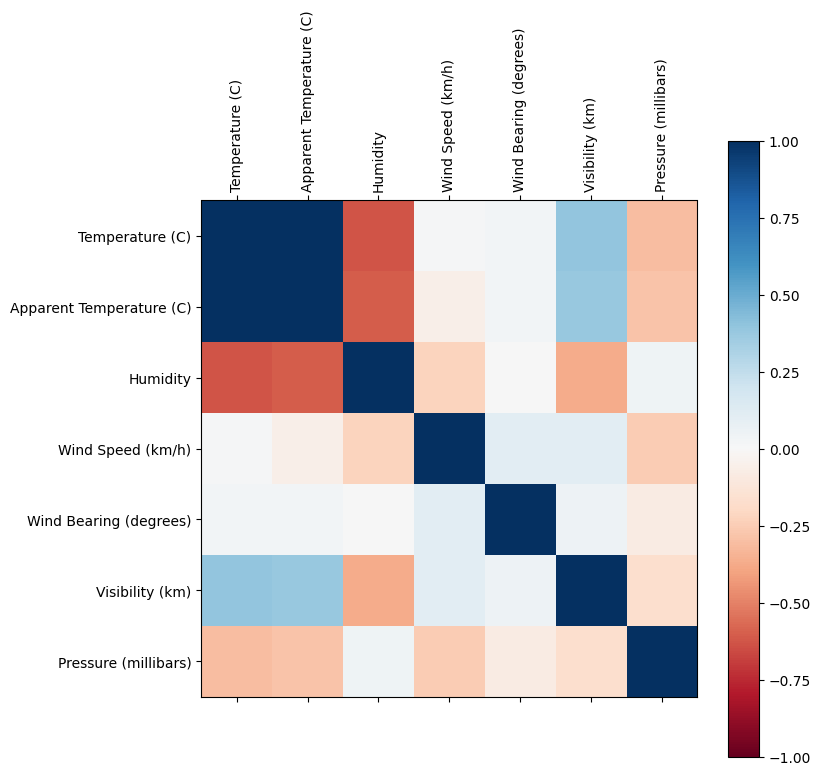

In [20]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=False)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

In [21]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

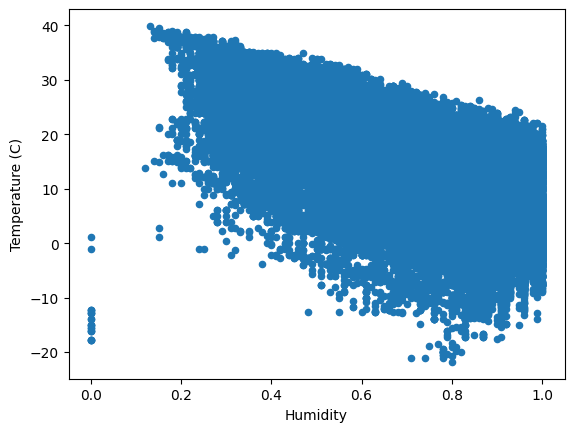

In [22]:
df.plot(kind='scatter', x='Humidity', y='Temperature (C)')

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

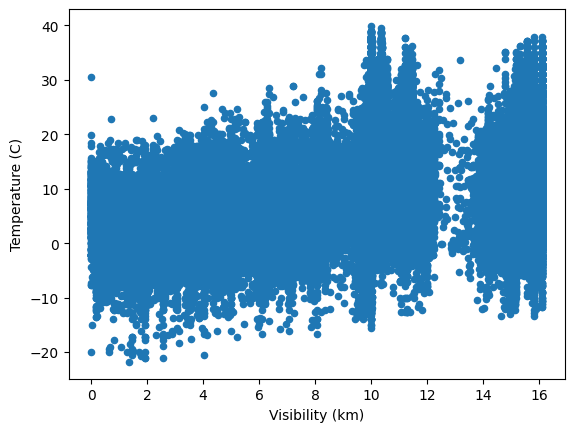

In [23]:
df.plot(kind='scatter', x='Visibility (km)', y='Temperature (C)')

# Завдання 5
Виведіть характеристики для категоріальних ознак. Для одного стовпчика виведіть кількості категорій. Який можна зробити висновок?

In [24]:
df.describe(include="object")

,Summary,Precip Type,Daily Summary
count,95165,94648,95165
unique,27,2,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31611,84116,20016


<Axes: xlabel='Summary'>

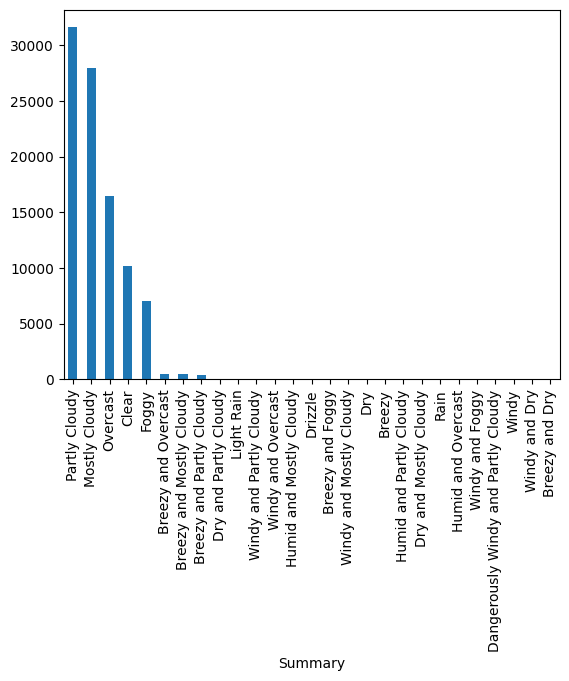

In [26]:
df['Summary'].value_counts().plot(kind='bar')

# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

<Axes: title={'center': 'Humidity'}, xlabel='Precip Type'>

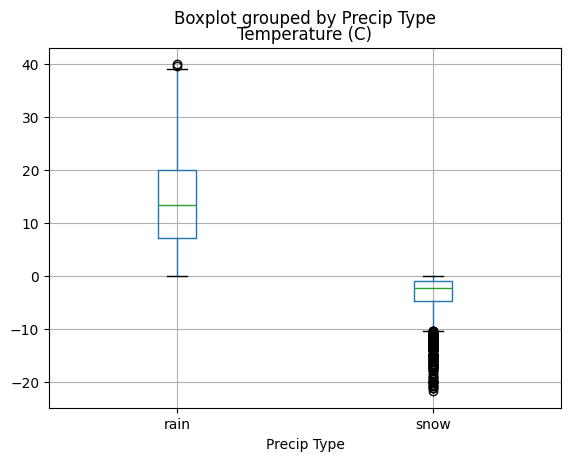

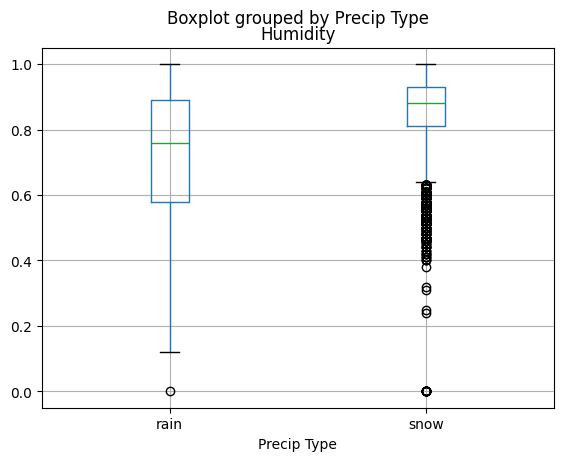

In [28]:
df.boxplot(by='Precip Type', column=("Temperature (C)"))
df.boxplot(by='Precip Type', column=( "Humidity"))

In [34]:

cat_names=df['Summary'].value_counts().nlargest(5).index

<Axes: title={'center': 'Temperature (C)'}, xlabel='Summary'>

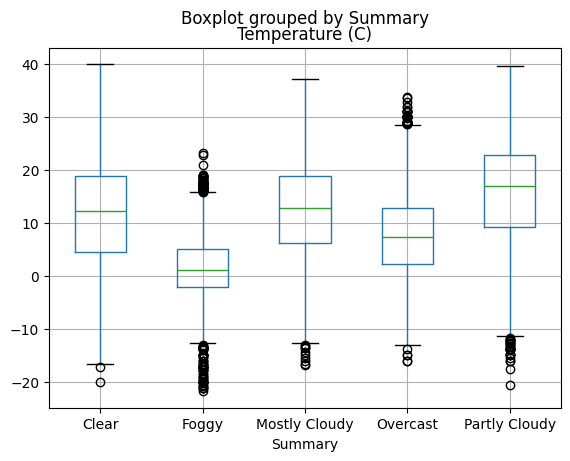

In [38]:
mask = df['Summary'].isin(cat_names)
newdf = df[mask]
newdf.boxplot(by='Summary', column="Temperature (C)")